# Box Plot

In [1]:
#import the dataset

pf<-read.csv('pseudo_facebook.tsv',sep = "\t")
library(ggplot2)

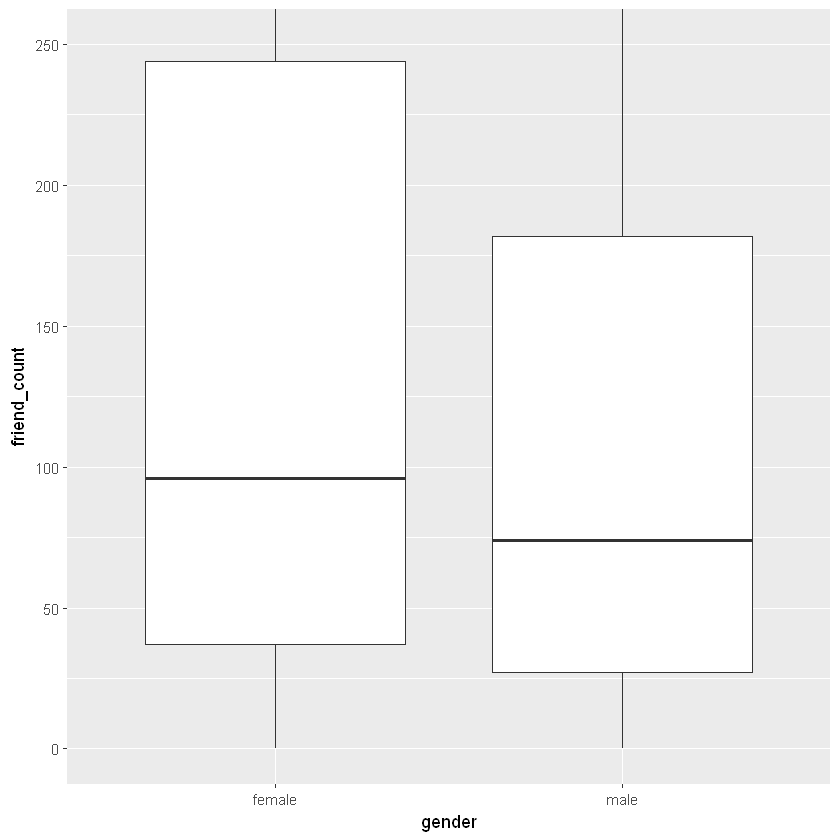

In [9]:
#plot boxplot

qplot(x=gender,y=friend_count,
      data=subset(pf,!is.na(gender)),
      geom = 'boxplot')+
coord_cartesian(ylim = c(0,250))

#Y lim removes data points and makes the plot inaccurate
#coord_cartesian() will zoom it for us without losing this removal of points



What is an outlier ? 

1.5 times greater than upper quartile of the boxplot
1.5 times less than lower quartile of the boxplot

Structure of boxplot

Minimum 
Lower Quatile - 25 % data is less than this value
Median - Middle of the dataset, 50% of data is greater than this value
Upper quartile - 25 % of data is greater than this value
Maximum

In [8]:
IQR(pf$age)
summary(pf$age)

[1] 30

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   20.00   28.00   37.28   50.00  113.00 

In [12]:
by(pf$friend_count,pf$gender,summary)

pf$gender: female
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0      37      96     242     244    4923 
------------------------------------------------------------ 
pf$gender: male
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0      27      74     165     182    4917 

Many assumptions can be made from the box plot, like :

This means, 75% of women have less than 242 friends
Only 25 % of men have less than 27 friends



# Usage of log plots 

On long tailed distributions

ie. the distribution has very small and very large values

Statistically speaking its called "overdispersed" 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


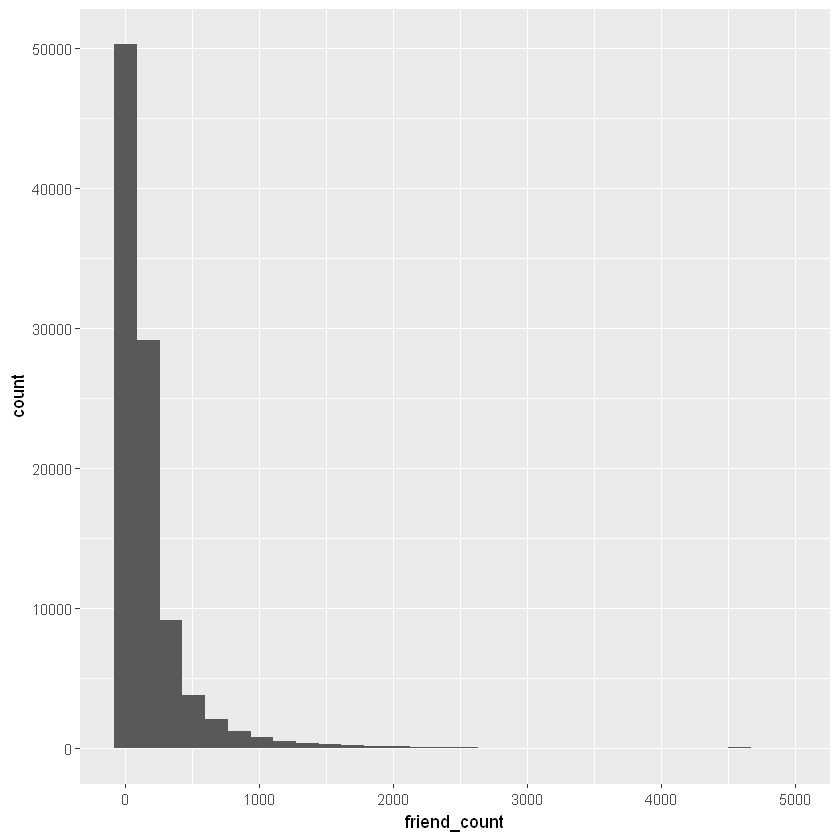

In [4]:
qplot(x=friend_count, data=pf)

In [5]:
summary(pf$friend_count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    31.0    82.0   196.4   206.0  4923.0 

In [6]:
summary(log10(pf$friend_count))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   -Inf   1.491   1.914    -Inf   2.314   3.692 

Here as we see, there is a problem. "-Inf" as Min and Mean

To avoid it, we may add a bias

In [9]:
summary(log10(pf$friend_count+1))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.505   1.919   1.868   2.316   3.692 

In [10]:
summary(sqrt(pf$friend_count+1))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   5.657   9.110  11.180  14.390  70.170 

Another variation is sqrt

# Creating multiple plots in one graph

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


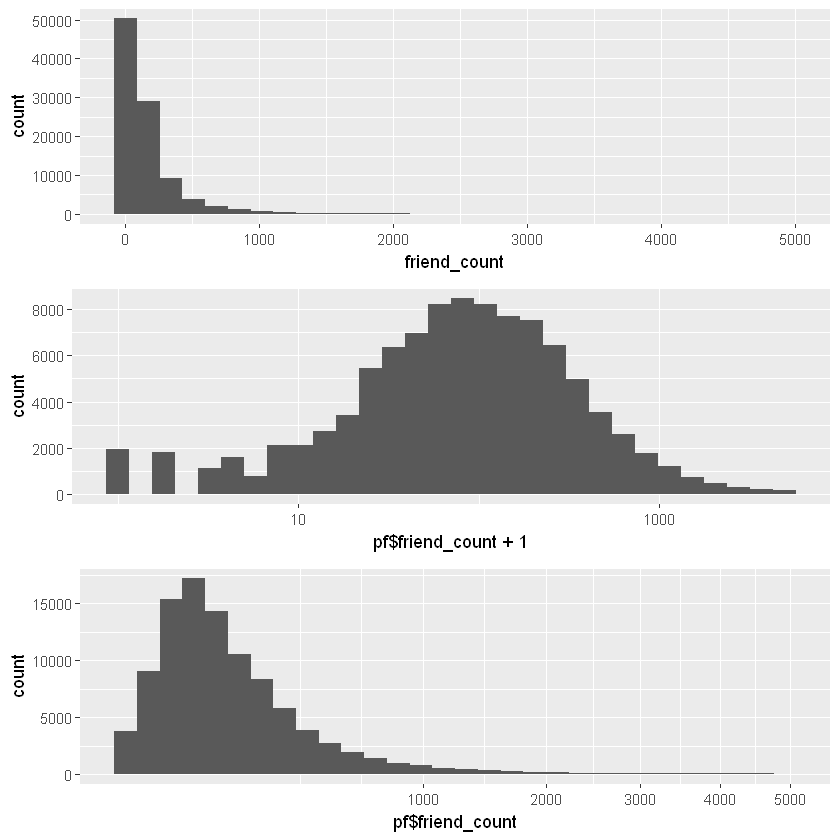

In [5]:
# define individual plots
library(gridExtra)
library(ggplot2)
p1 <- qplot(x=friend_count,data = pf)
p2 <- qplot(x=pf$friend_count+1,data = pf)+scale_x_log10()
p3 <- qplot(x=pf$friend_count,data = pf)+scale_x_sqrt()
# p4 = ggplot(...)
# arrange plots in grid
grid.arrange(p1, p2,p3, ncol=1)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Transformation introduced infinite values in continuous x-axis"`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1962 rows containing non-finite values (stat_bin)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


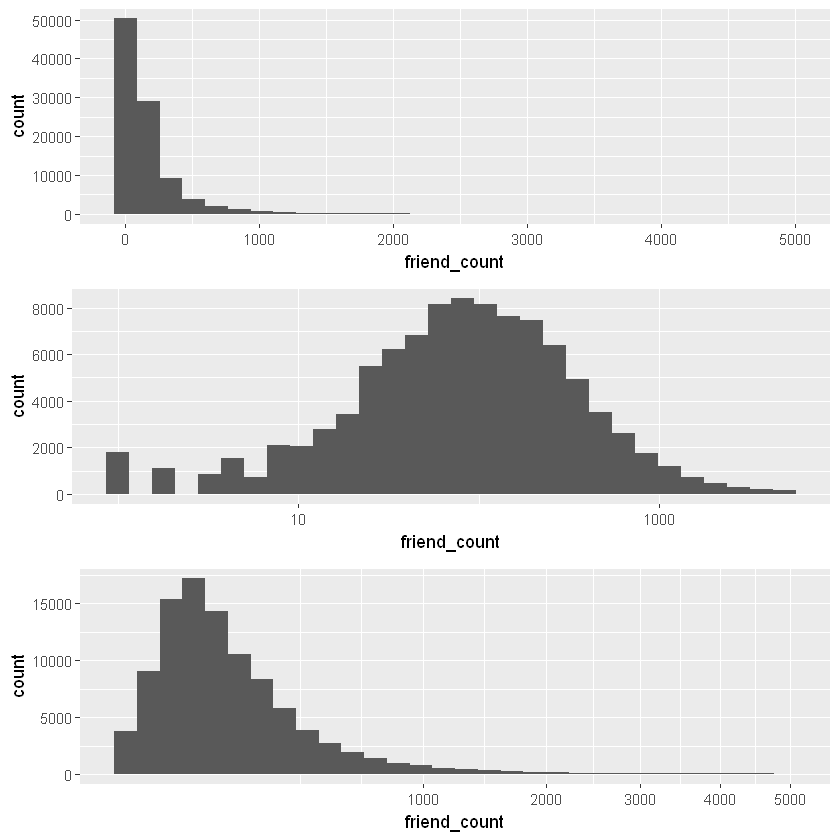

In [9]:
p1 <- ggplot(aes(x=friend_count),data = pf)+geom_histogram()
p2 <- p1+scale_x_log10()
p3 <- p1+scale_x_sqrt()
grid.arrange(p1, p2,p3, ncol=1)

## Frequency polygons

It compares the distributions. It's kind of like a histogram, but draws a curve connecting above the histograms.

..count../sum(..count..) is used for making the count proportional

Warning message:
"Removed 86947 rows containing non-finite values (stat_bin)."Warning message:
"Removed 4 rows containing missing values (geom_path)."

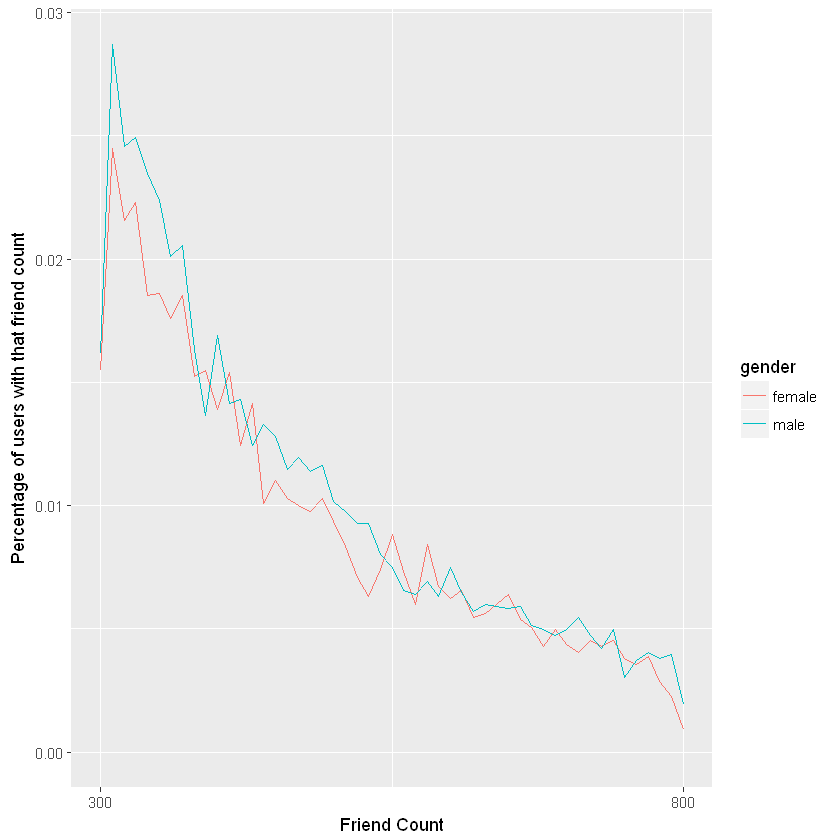

In [4]:
ggplot(aes(x = friend_count, y = ..count../sum(..count..)), data = subset(pf, !is.na(gender))) + 
  geom_freqpoly(aes(color = gender), binwidth=10) + 
  scale_x_continuous(limits = c(300, 800), breaks = seq(300, 800, 500)) + 
  xlab('Friend Count') + 
  ylab('Percentage of users with that friend count')

Warning message:
"Transformation introduced infinite values in continuous x-axis"`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 60935 rows containing non-finite values (stat_bin)."

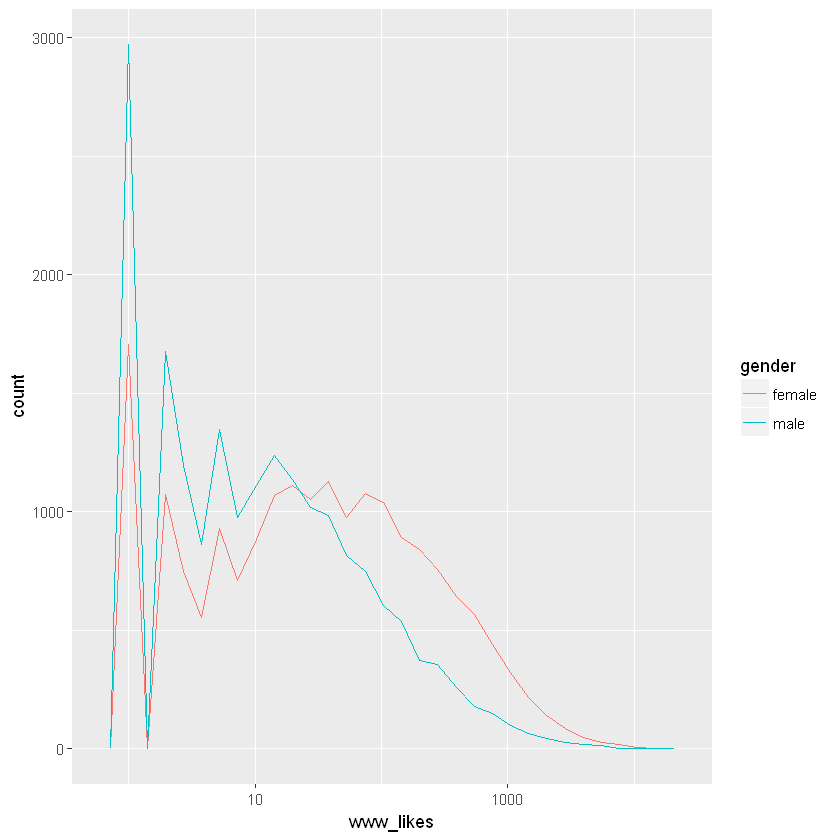

In [11]:
ggplot(aes(x = www_likes), data = subset(pf, !is.na(gender))) + 
  geom_freqpoly(aes(color = gender)) + 
  scale_x_log10()

Warning message:
"Removed 1291 rows containing non-finite values (stat_bin)."Warning message:
"Removed 4 rows containing missing values (geom_path)."

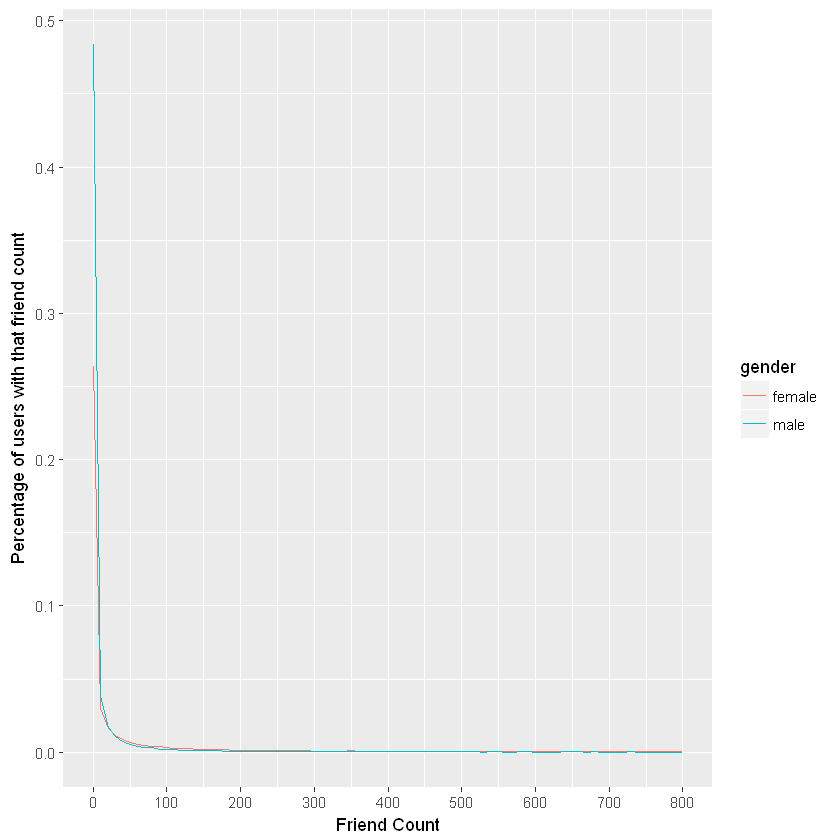

In [7]:
ggplot(aes(x = www_likes, y = ..count../sum(..count..)), data = subset(pf, !is.na(gender))) + 
  geom_freqpoly(aes(color = gender), binwidth=10) + 
  scale_x_continuous(limits = c(0, 800), breaks = seq(0, 800, 100)) + 
  xlab('Friend Count') + 
  ylab('Percentage of users with that friend count')

##  To plot the frequency polygon

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


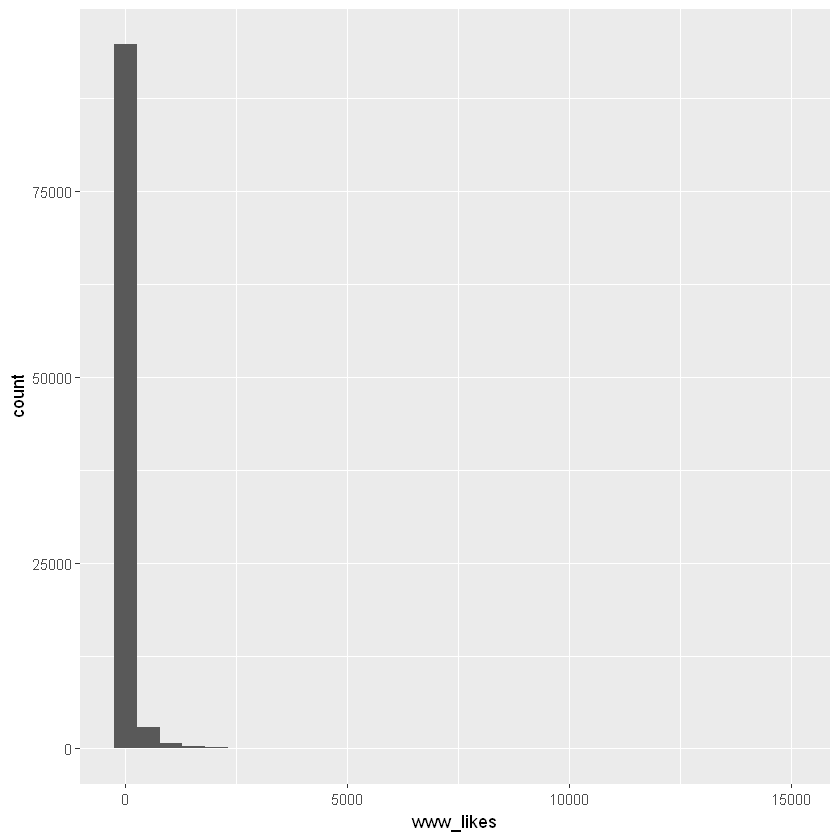

In [8]:
# plot a simple histogram

qplot(x=www_likes, data = pf)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


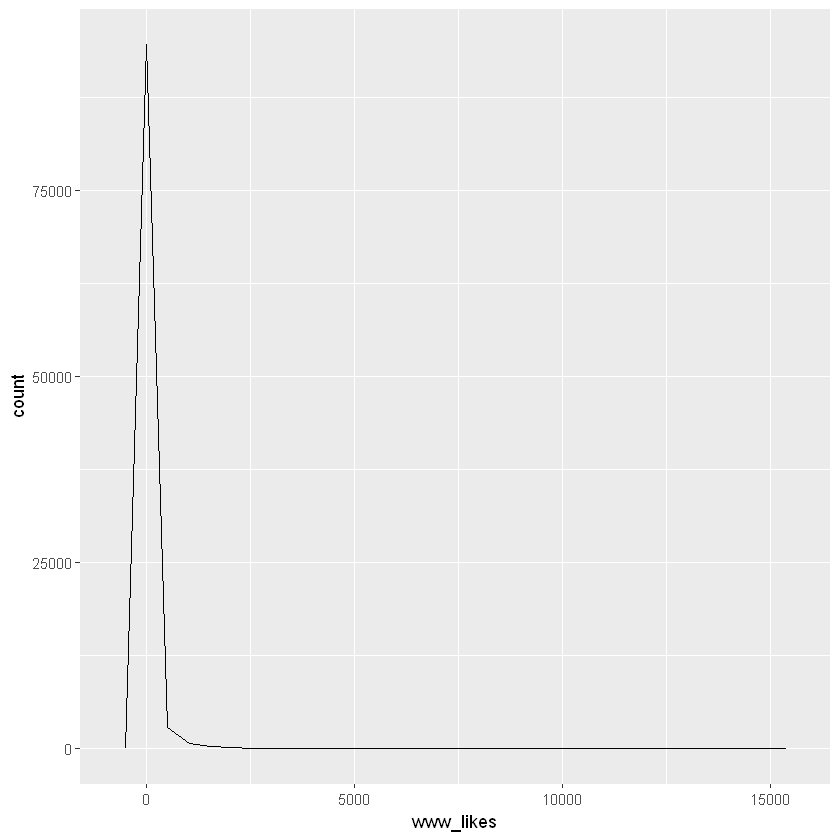

In [10]:
# Remove the gender "NaN" by subsetting 
qplot(x=www_likes,data = subset(pf,!is.na(gender)),geom="freqpoly")

# Now we have only one polygon


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


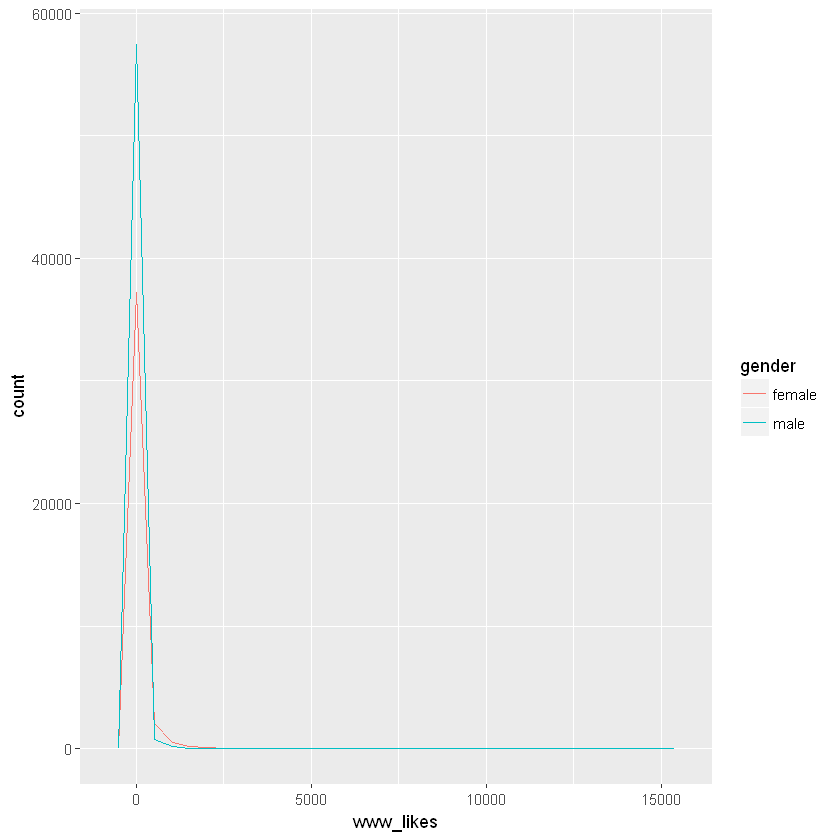

In [16]:
qplot(x=www_likes,data = subset(pf,!is.na(gender)),geom="freqpoly",color=gender) +
scale_x_continuous()
        
# Now the freq. polygon is plotted in basis of gender

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Warning message:
"Transformation introduced infinite values in continuous x-axis"`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 60935 rows containing non-finite values (stat_bin)."

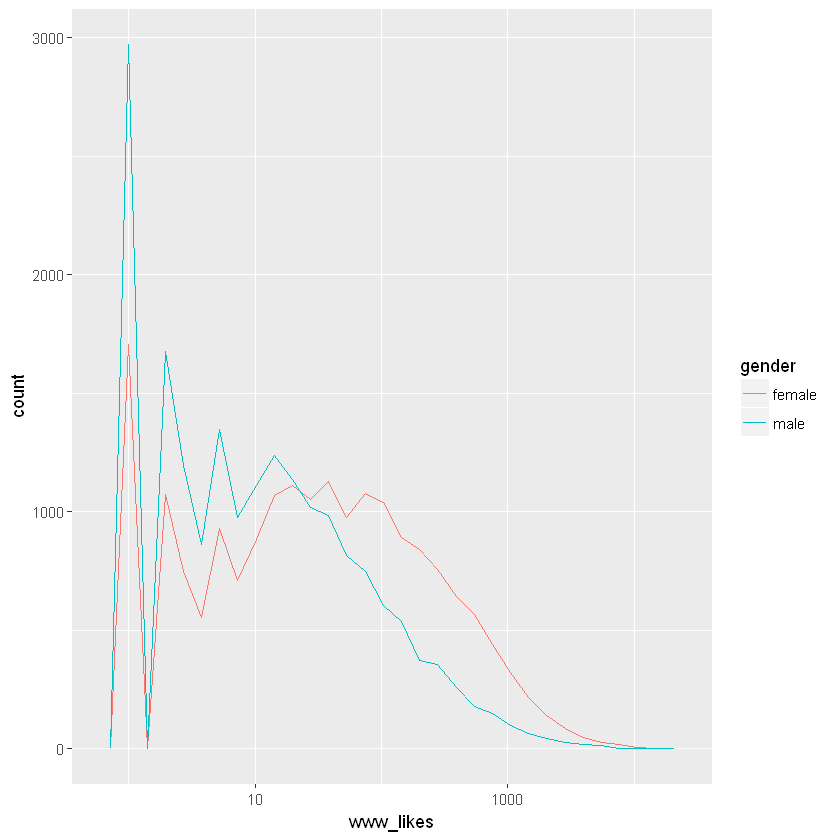

In [18]:
# since this is a long tailed data we are going for logarithmic scale 
qplot(x=www_likes,data = subset(pf,!is.na(gender)),geom="freqpoly",color=gender) +
scale_x_continuous()+
scale_x_log10()

In [20]:
# numerical summary 

by(pf$www_likes,pf$gender,sum)

pf$gender: female
[1] 3507665
------------------------------------------------------------ 
pf$gender: male
[1] 1430175

In [24]:
by(pf$www_likes,pf$gender,mean)

pf$gender: female
[1] 87.1383
------------------------------------------------------------ 
pf$gender: male
[1] 24.41655

# Getting logical

In [25]:
summary(pf$mobile_likes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     4.0   106.1    46.0 25110.0 

Here we can say that, since median is 4, we can expect that there's a lot of zeros in it. So changing the summary command a little bit. 

In [27]:
summary(pf$mobile_likes>0)

   Mode   FALSE    TRUE    NA's 
logical   35056   63947       0 

In [37]:
pf$mobile_check_in <- NA
pf$mobile_check_in<-ifelse(pf$mobile_likes>0,1,0)
pf$mobile_check_in<-factor(pf$mobile_check_in)
summary(pf$mobile_check_in)
prop.table(table(pf$mobile_check_in))
# this can be done using below code
sum(pf$mobile_check_in==1)/length(pf$mobile_check_in)

0     1 
35056 63947


        0         1 
0.3540903 0.6459097 

[1] 0.6459097